## Install dependencies

In [269]:
!pip install git+https://github.com/LIAAD/yake
!pip install mrakun
!pip install textacy

  Cloning https://github.com/LIAAD/yake to /private/var/folders/m0/7sv6dmqx4xn0n5c2pgc297dw0000gp/T/pip-req-build-7ou4sacq
  Running command git clone -q https://github.com/LIAAD/yake /private/var/folders/m0/7sv6dmqx4xn0n5c2pgc297dw0000gp/T/pip-req-build-7ou4sacq
  Created wheel for yake: filename=yake-0.4.3-py2.py3-none-any.whl size=67198 sha256=ceaefa9aac873eaa1fbe1e3543dbd167a140657ba282c65f3f98cf92c575dd39
  Stored in directory: /private/var/folders/m0/7sv6dmqx4xn0n5c2pgc297dw0000gp/T/pip-ephem-wheel-cache-x0x3k7fm/wheels/be/35/27/e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
Successfully built yake
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [249]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/abuonomo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Main

In [319]:
import yake
import RAKE
from mrakun import RakunDetector
from textacy.ke import textrank
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from yake.highlight import TextHighlighter
from IPython.core.display import HTML
import numpy as np
from pathlib import Path
import pandas as pd
import json
import matplotlib.pyplot as plt

In [274]:
NLP = spacy.load("en_core_web_sm")

In [304]:
infile = Path("../data/full_04_01_2020/kwds.jsonl")

In [308]:
chunks = pd.read_json(infile, orient='records', lines=True, chunksize=10_000)

In [309]:
df = next(chunks)

In [347]:
# df['keyword'].explode().str.lower()

In [348]:
vc = df['keyword'].explode().str.lower().value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

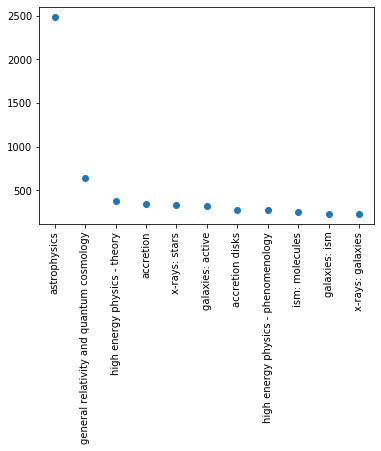

In [354]:
plt.plot(vc.index[0:11], vc[0:11], 'o')
plt.xticks(rotation=90)

In [ ]:
topics = 

In [250]:
hyperparameters = {
    "distance_threshold":2,
    "distance_method": "editdistance",
    "num_keywords" : 10,
    "pair_diff_length":2,
    "stopwords" : STOP_WORDS,
    "bigram_count_threshold":2,
    "num_tokens":[1,2],
    "max_similar" : 3, ## n most similar can show up n times
    "max_occurrence" : 3 ## maximum frequency overall
}

In [251]:
rake_extractor = RAKE.Rake(list(STOP_WORDS))
yake_extractor = yake.KeywordExtractor()
rakun_extractor = RakunDetector(hyperparameters)

30-Apr-20 09:56:48 - Initiated a keyword detector instance.


In [252]:
fl = '0.5'

In [253]:
th = TextHighlighter(max_ngram_size=3, highlight_pre=f"<span class='my_class' style='background-color:yellow; opacity:{fl}' >", highlight_post="</span>")

In [254]:
text = """The Ulysses observations have charted the heliosphere around the minimum in the 11 year cycle of solar activity, revealing the large scale properties of the heliospheric medium and its micro-scale characteristics. This book presents for the first time, a comprehensive review of the results of the Ulysses mission.<BR />The first chapter provides an overview of the region, introducing the heliosphere prior to the Ulysses mission, and the objectives and characteristics of the mission itself. Subsequent chapters discuss in detail specific areas of the heliosphere, including the solar wind, large and small scale features, cosmic rays and energetic particles, and the observations of interstellar gas and cosmic dust. Each of these chapters is written by members of the Ulysses science team, concentrating on their own areas of expertise, and is written in a clear and accessible way.<BR />In this book, the authors aim to summarise our understanding of the heliosphere near solar minimum and to provide the basis for understanding the more complex state of the heliosphere around solar maximum, which will be observed during the next phase of the Ulysses mission. <P />"""

In [255]:
text = """By using the IMAGE magnetometer network data, we compare the geomagnetic variation field B and its time derivative dB/dt in and near the auroral region. We show that although the auroral electrojet is the main reason for large B's, it cannot alone produce large dB/dt's, so smaller-scale current systems are important. This is evidenced by the horizontal field: the geographic north component (X) is clearly larger than the eastward one (Y) in the auroral region, but dX/dt and dY/dt are nearly equal. This result is important when geomagnetic induction risks on man-made conductors are estimated. The key quantity is the horizontal geoelectric field, and contrary to what is often assumed, it can have large values in any direction, not just parallel to the electrojet. <P />"""

In [276]:
doc = NLP(text)

In [282]:
rake_kwds = rake.run(text, minFrequency=1, minCharacters=3)
yake_kwds = kw_extractor.extract_keywords(text)
rakun_kwds = rakun_extractor.find_keywords(text, input_type = "text")
textrank_kwds = textrank(doc, normalize="lemma", topn=999)

30-Apr-20 10:14:00 - Number of nodes reduced from 44 to 41


In [293]:
rake_kwds_lim = [(k, v) for k, v in rake_kwds if v > -10]
yake_kwds_lim = [(k, v) for k, v in yake_kwds if v < 99999]
rakun_kwds_lim = [(k, v) for k, v in yake_kwds if v < 99999]
textrank_kwds_lim = [(k, v) for k, v in textrank_kwds if v < 99999]

In [294]:
rake_ht = th.highlight(text, rake_kwds_lim)
yake_ht = th.highlight(text, yake_kwds_lim)
rakun_ht = th.highlight(text, rakun_kwds_lim)
textrank_ht = th.highlight(text, textrank_kwds_lim)

In [295]:
vals = np.array([v for k,v in rake_kwds_lim])

In [296]:
tvals = (vals - vals.min()) / (vals.max() - vals.min())

In [297]:
# i = 0
# while True:
#     try:
#         s = rake_ht.index('FILL_VAL')
#     except ValueError:
#         break
#     print(s)
#     rake_ht = rake_ht[:s] + str(tvals[i].round(2)) + rake_ht[s + len(fl):]
#     i += 1

In [298]:
HTML(rake_ht)

In [299]:
HTML(yake_ht)

In [300]:
HTML(rakun_ht)

In [302]:
HTML(textrank_ht)